# Importing necessery libraries

In [1]:
pip install pycocotools

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp37-cp37m-linux_x86_64.whl size=373909 sha256=0548ed22288bc1daaec01caa975c3a1ee40274fd517412dd9a28f3197dd53f68
  Stored in directory: /root/.cache/pip/wheels/06/f6/f9/9cc49c6de8e3cf27dfddd91bf46595a057141d4583a2adaf03
Successfully built pycocotools
Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries
import numpy as np
import pandas as pd
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import os
import tarfile
import cv2
from tqdm import tqdm
from fastai.vision.all import *

# Setting up workspace

In [3]:
# function to extract the data
# tar_file - the path to the .tar file
# path - the path where it will be extracted
def extract(tar_file, path):
    opened_tar = tarfile.open(tar_file)
     
    if tarfile.is_tarfile(tar_file):
        opened_tar.extractall(path)
    else:
        print("The tar file you entered is not a tar file")

In [4]:
# Checking our environment and extracting files accordingly
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    if os.path.exists("/kaggle/working/food-recognition-from-images-dat-255"):
        print('Path already existst')
    else:
        extract("/kaggle/input/food-recognition-from-images-dat-255/public_test_release_2.1.tar", 
            "/kaggle/working/food-recognition-from-images-dat-255/test")
        extract("/kaggle/input/food-recognition-from-images-dat-255/public_training_set_release_2.1.tar", 
            "/kaggle/working/food-recognition-from-images-dat-255/train")
        extract("/kaggle/input/food-recognition-from-images-dat-255/public_validation_set_release_2.1.tar", 
            "/kaggle/working/food-recognition-from-images-dat-255/validate")
else:
    if os.path.exists("C:/Users/BygCS/Desktop/Dat255/Data/data"):
        print('Path already existst')
    else:
        extract("C:/Users/BygCS/Desktop/Dat255/Data/public_test_release_2.1.tar", 
            "C:/Users/BygCS/Desktop/Dat255/Data/data/test")
        extract("C:/Users/BygCS/Desktop/Dat255/Data/public_training_set_release_2.1.tar", 
            "C:/Users/BygCS/Desktop/Dat255/Data/data/train")
        extract("C:/Users/BygCS/Desktop/Dat255/Data/public_validation_set_release_2.1.tar", 
            "C:/Users/BygCS/Desktop/Dat255/Data/data/validate")

In [5]:
# Checking our environment and set paths accordingly
if iskaggle:
    train_img_path = "/kaggle/working/food-recognition-from-images-dat-255/train/images/"
    train_annotations_path = "/kaggle/working/food-recognition-from-images-dat-255/train/annotations.json"
    train_coco = COCO(train_annotations_path)

    validation_img_path = "/kaggle/working/food-recognition-from-images-dat-255/validate/images/"
    validation_annotations_path = "/kaggle/working/food-recognition-from-images-dat-255/validate/annotations.json"
    validation_coco = COCO(validation_annotations_path)

    test_img_path = "/kaggle/working/food-recognition-from-images-dat-255/test/images/"

    train_mask_path = "/kaggle/working/food-recognition-from-images-dat-255/train/mask/"
    val_mask_path = "/kaggle/working/food-recognition-from-images-dat-255/validate/mask/"
else:
    train_img_path = "C:/Users/BygCS/Desktop/Dat255/Data/data/train/images/"
    train_annotations_path = "C:/Users/BygCS/Desktop/Dat255/Data/data/train/annotations.json"
    train_coco = COCO(train_annotations_path)

    validation_img_path = "C:/Users/BygCS/Desktop/Dat255/Data/data/validate/images/"
    validation_annotations_path = "C:/Users/BygCS/Desktop/Dat255/Data/data/validate/annotations.json"
    validation_coco = COCO(validation_annotations_path)

    test_img_path = "C:/Users/BygCS/Desktop/Dat255/Data/data/test/images/"

    train_mask_path = 'C:/Users/BygCS/Desktop/Dat255/Data/data/train/mask/'
    val_mask_path = 'C:/Users/BygCS/Desktop/Dat255/Data/data/validate/mask/'

loading annotations into memory...
Done (t=7.34s)
creating index...
index created!
loading annotations into memory...
Done (t=0.06s)
creating index...
index created!


In [6]:
# Reading the annotation files
with open(train_annotations_path) as f:
    train_annotations = json.load(f)

with open(validation_annotations_path) as f:
    validation_annotations = json.load(f)

# Exploring the data

In [7]:
train_annotations.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [8]:
train_annotations["categories"][42]

{'id': 100145,
 'name': 'blueberries',
 'name_readable': 'blueberries',
 'supercategory': 'food'}

In [9]:
train_annotations["info"][:]

'{}'

In [10]:
train_annotations["images"][:5]

[{'id': 131072, 'file_name': '131072.jpg', 'width': 464, 'height': 464},
 {'id': 131087, 'file_name': '131087.jpg', 'width': 464, 'height': 464},
 {'id': 131088, 'file_name': '131088.jpg', 'width': 511, 'height': 512},
 {'id': 131094, 'file_name': '131094.jpg', 'width': 480, 'height': 480},
 {'id': 131096, 'file_name': '131096.jpg', 'width': 464, 'height': 464}]

In [11]:
train_annotations["annotations"][0]

{'id': 184123,
 'image_id': 131072,
 'category_id': 101246,
 'segmentation': [[169.0,
   379.5,
   130.0,
   374.5,
   112.0,
   363.5,
   94.5,
   340.0,
   61.5,
   213.0,
   61.5,
   188.0,
   70.5,
   168.0,
   87.0,
   152.5,
   103.0,
   143.5,
   123.0,
   139.5,
   185.0,
   118.5,
   226.0,
   90.5,
   249.0,
   87.5,
   309.0,
   88.5,
   339.0,
   110.5,
   350.5,
   125.00000000000001,
   354.5,
   155.0,
   382.5,
   231.0,
   383.5,
   277.0,
   360.0,
   303.5,
   327.0,
   331.5,
   308.0,
   343.5,
   216.0,
   373.5]],
 'area': 71393.0,
 'bbox': [61.5, 61.5, 318.0, 322.0],
 'iscrowd': 0}

In [12]:
cat_ids = train_coco.getCatIds()
print(f'{len(cat_ids)}')

323


In [13]:
cats = train_coco.loadCats(cat_ids)
cat_names = [cat['name'] for cat in cats]
print(cat_names)

['beetroot-steamed-without-addition-of-salt', 'bread_wholemeal', 'jam', 'water', 'bread', 'banana', 'soft_cheese', 'ham_raw', 'hard_cheese', 'cottage_cheese', 'coffee', 'fruit_mixed', 'pancake', 'tea', 'salmon_smoked', 'avocado', 'spring_onion_scallion', 'ristretto_with_caffeine', 'ham_n_s', 'egg', 'bacon', 'chips_french_fries', 'juice_apple', 'chicken', 'tomato', 'broccoli', 'shrimp_prawn', 'carrot', 'chickpeas', 'french_salad_dressing', 'pasta_hornli_ch', 'sauce_cream', 'pasta_n_s', 'tomato_sauce', 'cheese_n_s', 'pear', 'cashew_nut', 'almonds', 'lentil_n_s', 'mixed_vegetables', 'peanut_butter', 'apple', 'blueberries', 'cucumber', 'yogurt', 'butter', 'mayonnaise', 'soup', 'wine_red', 'wine_white', 'green_bean_steamed_without_addition_of_salt', 'sausage', 'pizza_margherita_baked', 'salami_ch', 'mushroom', 'tart_n_s', 'rice', 'white_coffee', 'sunflower_seeds', 'bell_pepper_red_raw', 'zucchini', 'asparagus', 'tartar_sauce', 'lye_pretzel_soft', 'cucumber_pickled_ch', 'curry_vegetarian', '

In [14]:
# Getting all categoriy with respect to their total images
imgs_per_cat = {}

for n, i in enumerate(cat_ids):
    imgIds = train_coco.getImgIds(catIds=i)
    label = cat_names[n]
    imgs_per_cat[label] = len(imgIds)

imgs_per_cat = sorted(imgs_per_cat.items(), key=lambda x: x[1], reverse=True)

print(imgs_per_cat)

[('water', 4372), ('salad_leaf_salad_green', 2807), ('tomato', 2686), ('bread_white', 2526), ('carrot', 2193), ('butter', 2180), ('bread_wholemeal', 2030), ('coffee', 2005), ('tea', 1847), ('rice', 1546), ('egg', 1424), ('bread', 1287), ('apple', 1270), ('mixed_vegetables', 1255), ('cucumber', 1102), ('jam', 1063), ('wine_red', 936), ('cheese_n_s', 918), ('banana', 875), ('potato', 854), ('bell_pepper_red_raw', 806), ('bread_whole_wheat', 782), ('hard_cheese', 729), ('white_coffee', 699), ('espresso', 699), ('mixed_salad_chopped_without_sauce', 659), ('avocado', 647), ('tomato_sauce', 623), ('zucchini', 605), ('beef_n_s', 572), ('strawberries', 568), ('broccoli', 560), ('honey', 548), ('parmesan', 542), ('wine_white', 537), ('pasta_spaghetti', 517), ('yogurt', 513), ('mushroom', 490), ('braided_white_loaf_ch', 487), ('chips_french_fries', 478), ('chicken', 468), ('sausage', 465), ('onion', 451), ('dark_chocolate', 439), ('mayonnaise', 429), ('bacon', 426), ('pizza_margherita_baked', 41

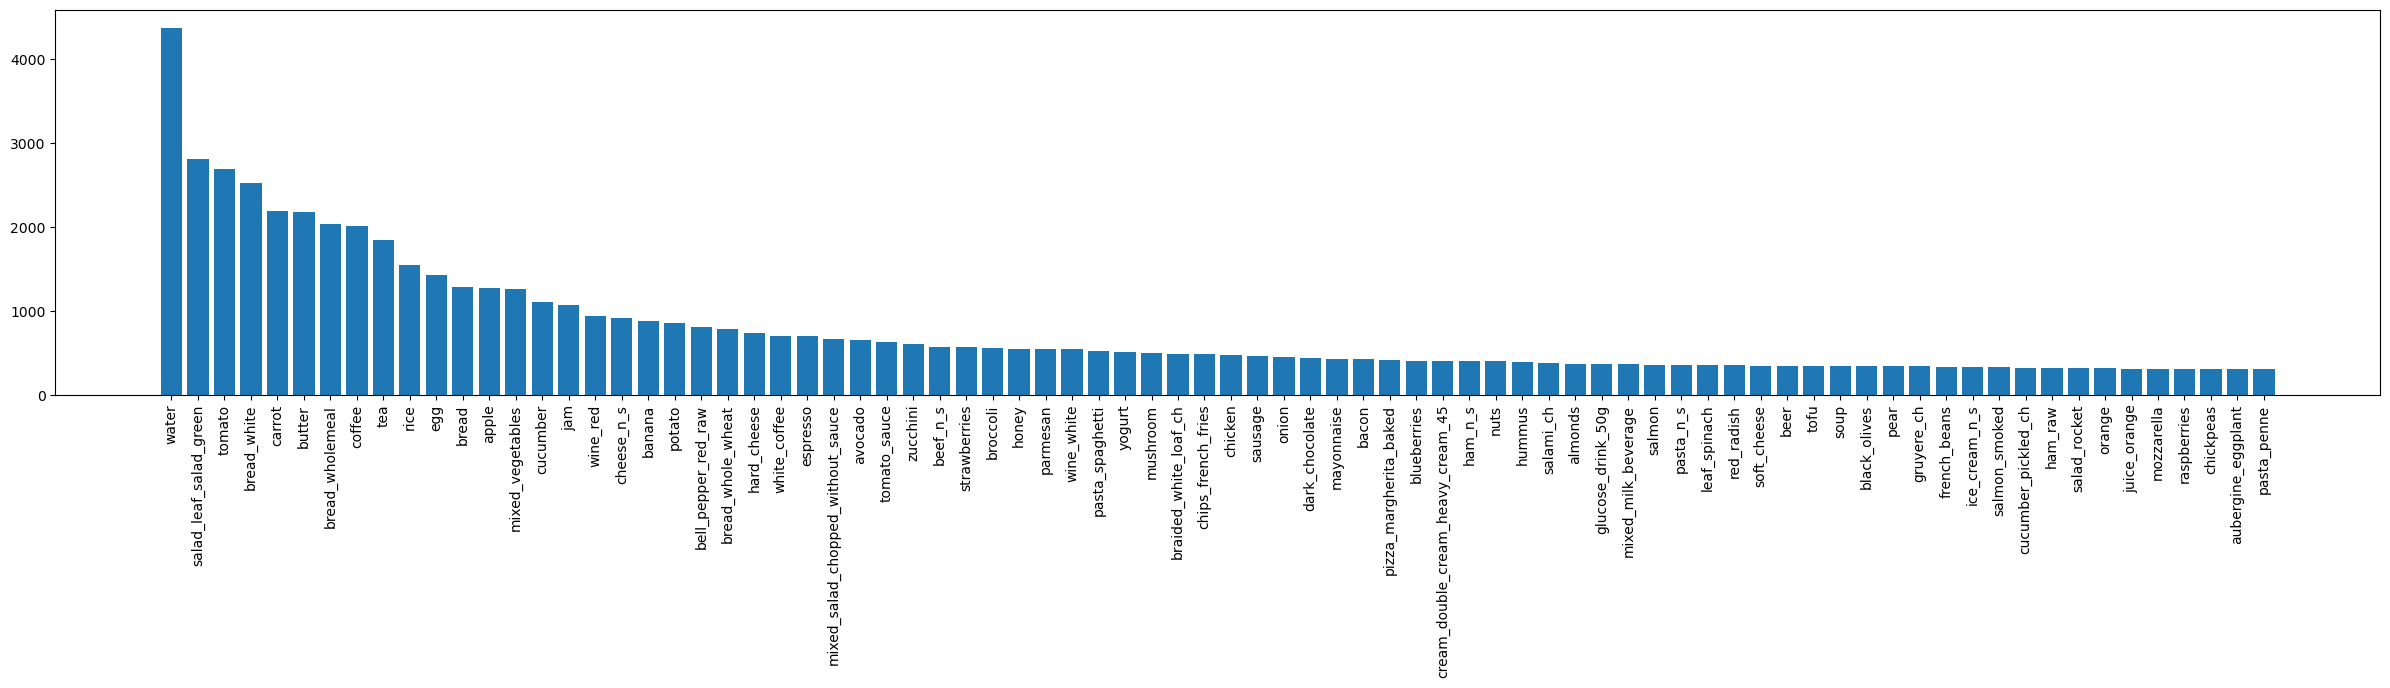

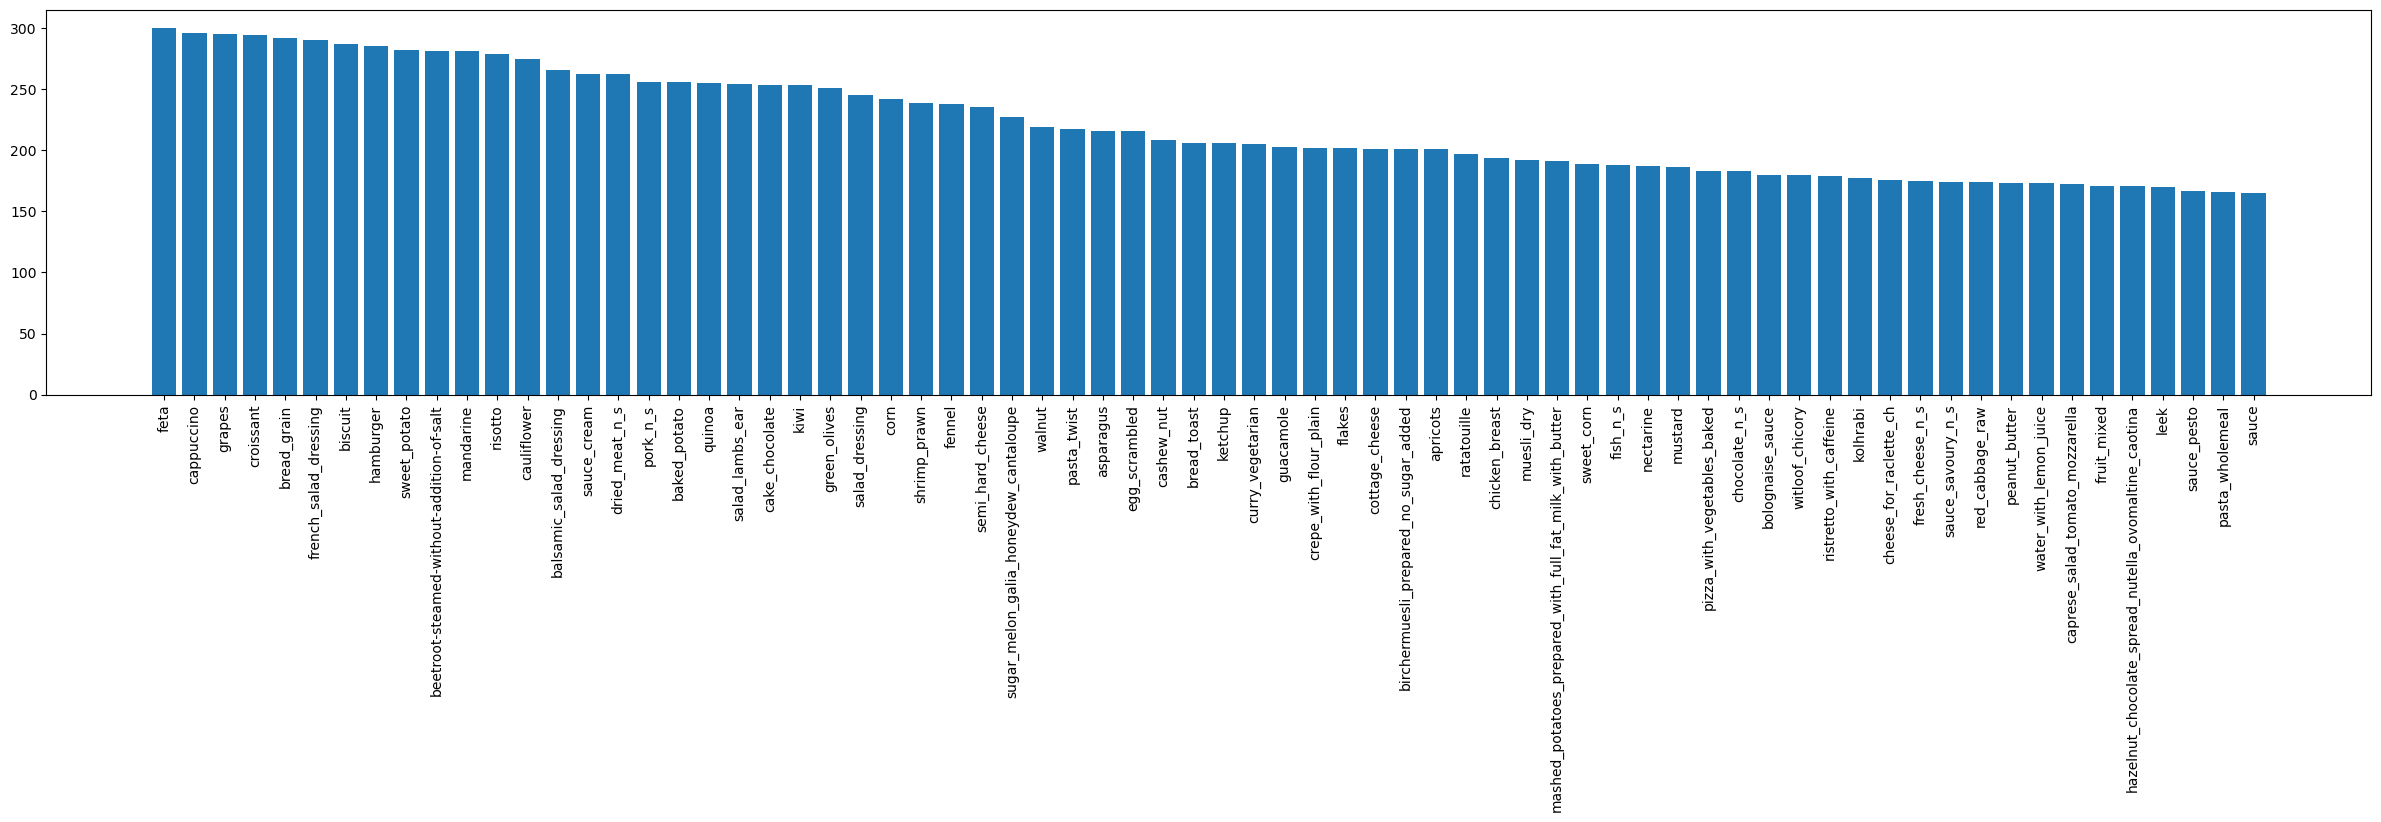

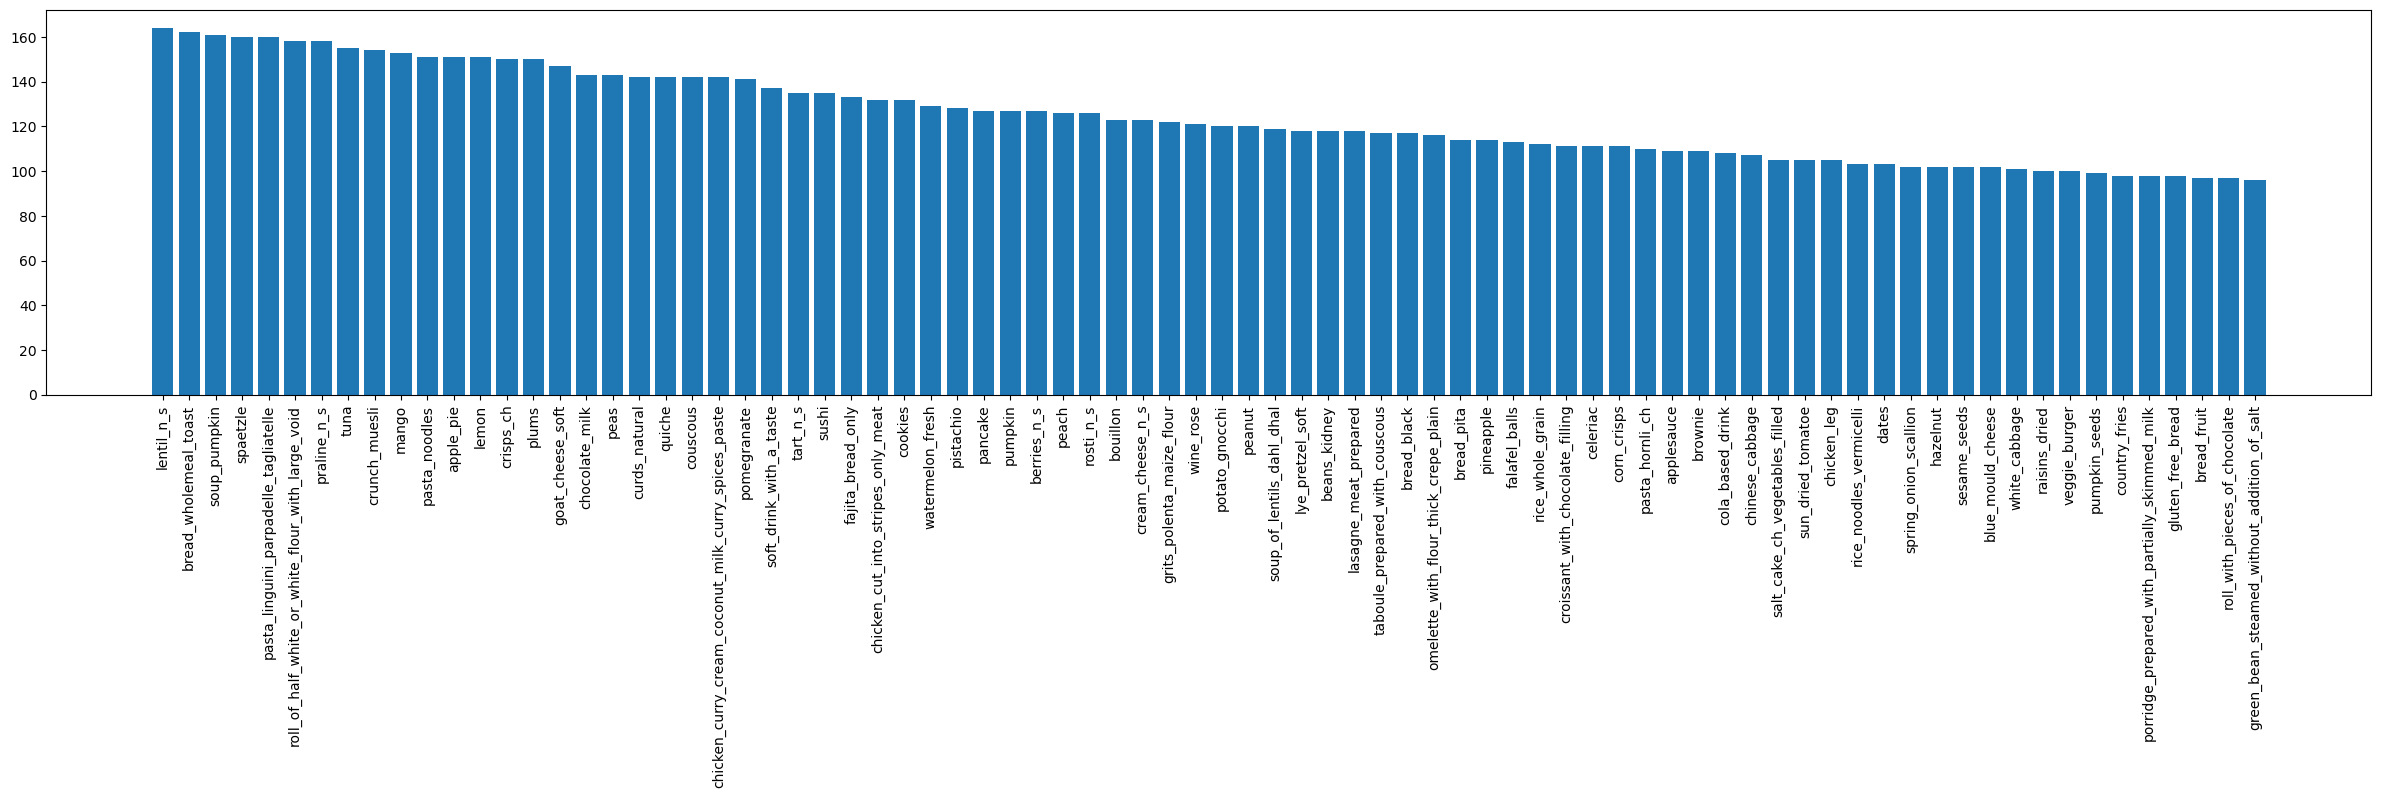

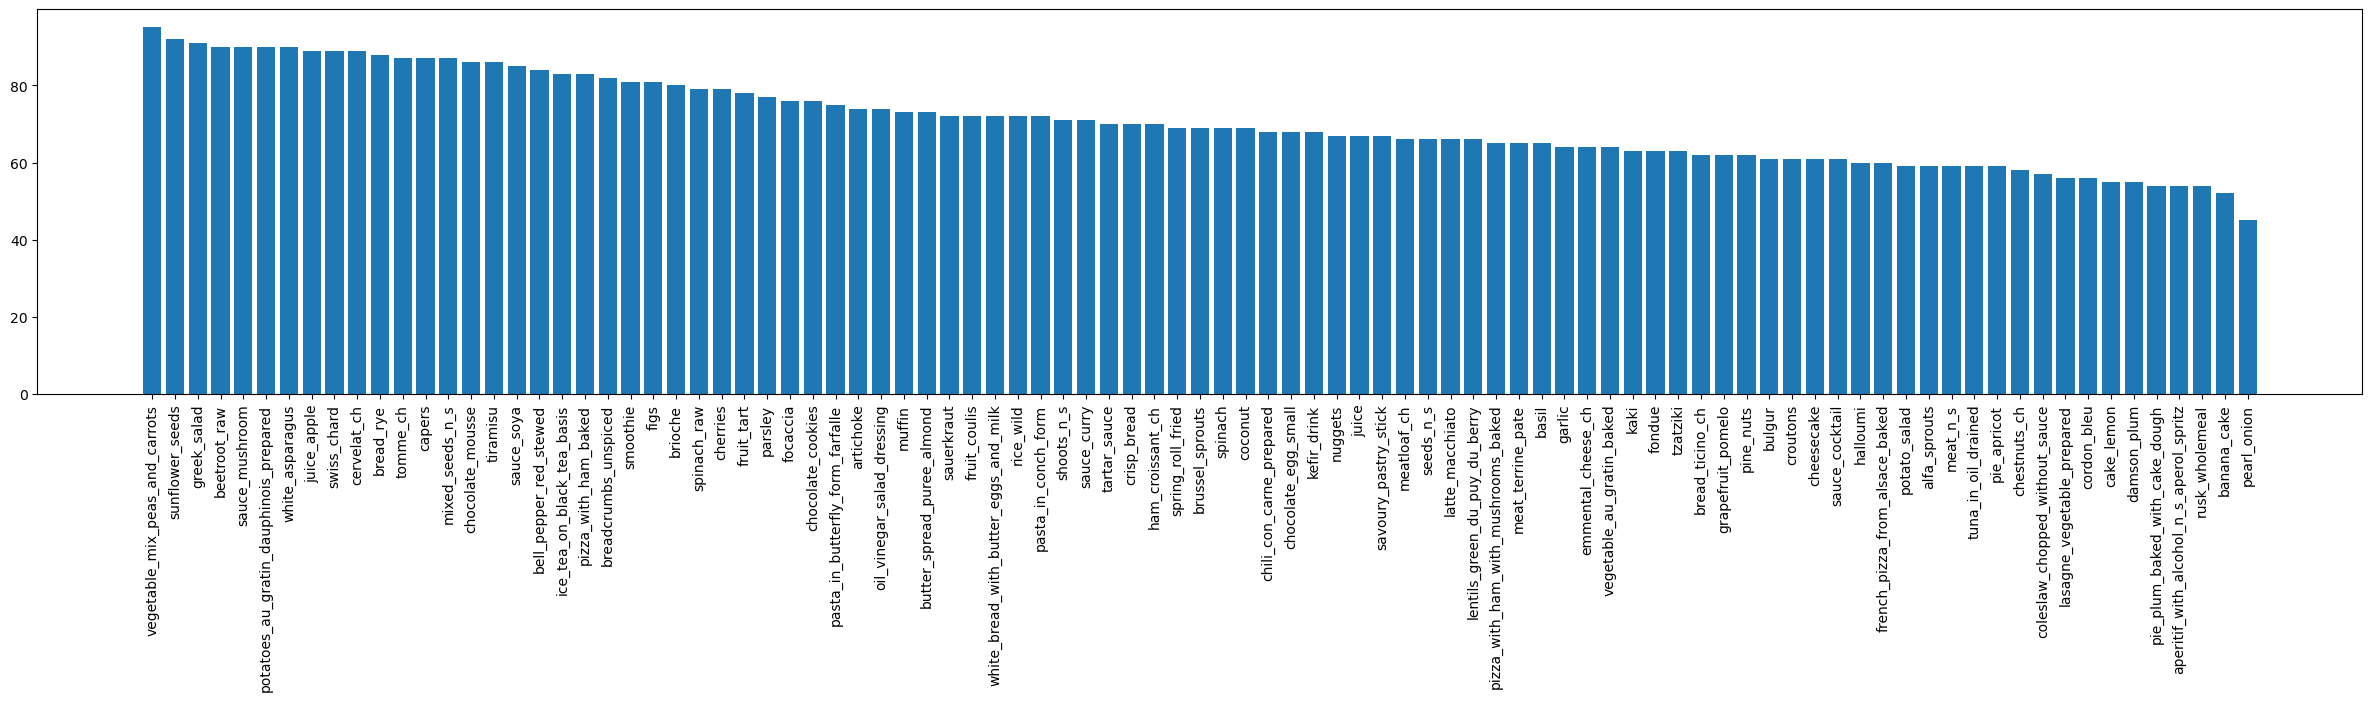

In [15]:
%matplotlib inline

plt.figure(figsize=(30,5))
plt.bar(range(80), [val[1] for val in imgs_per_cat[:80]])
plt.xticks(range(80), [val[0] for val in imgs_per_cat[:80]])
plt.xticks(rotation=90)

plt.figure(figsize=(30,5))
plt.bar(range(80, 150, 1), [val[1] for val in imgs_per_cat[80:150]])
plt.xticks(range(80, 150, 1), [val[0] for val in imgs_per_cat[80:150]])
plt.xticks(rotation=90)

plt.figure(figsize=(30,5))
plt.bar(range(150, 230, 1), [val[1] for val in imgs_per_cat[150:230]])
plt.xticks(range(150, 230, 1), [val[0] for val in imgs_per_cat[150:230]])
plt.xticks(rotation=90)

plt.figure(figsize=(30,5))
plt.bar(range(230, len(imgs_per_cat), 1), [val[1] for val in imgs_per_cat[230:]])
plt.xticks(range(230, len(imgs_per_cat), 1), [val[0] for val in imgs_per_cat[230:]])
plt.xticks(rotation=90)

plt.show()

# Visualization

In [16]:
ann_ids = train_coco.getAnnIds(imgIds=train_annotations['images'][3]['id'])
anns = train_coco.loadAnns(ann_ids)

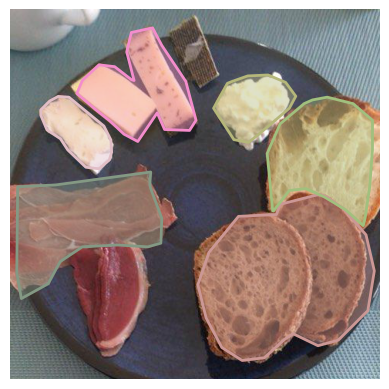

In [17]:
plt.imshow(plt.imread(train_img_path+train_annotations['images'][3]['file_name']))
plt.axis(False)

train_coco.showAnns(anns)

In [18]:
ann_ids = train_coco.getAnnIds(imgIds=train_annotations['images'][3]['id'])
anns = train_coco.loadAnns(ann_ids)

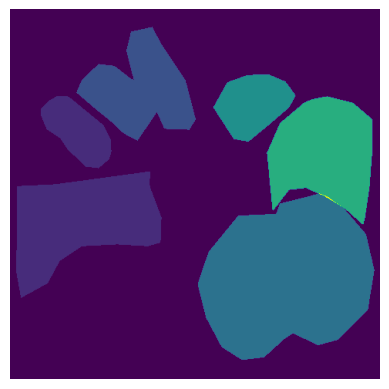

In [19]:
mask = train_coco.annToMask(anns[0])
for i in range(len(anns)):
    mask += train_coco.annToMask(anns[i]) * i

plt.imshow(mask)
plt.axis(False)
plt.show()

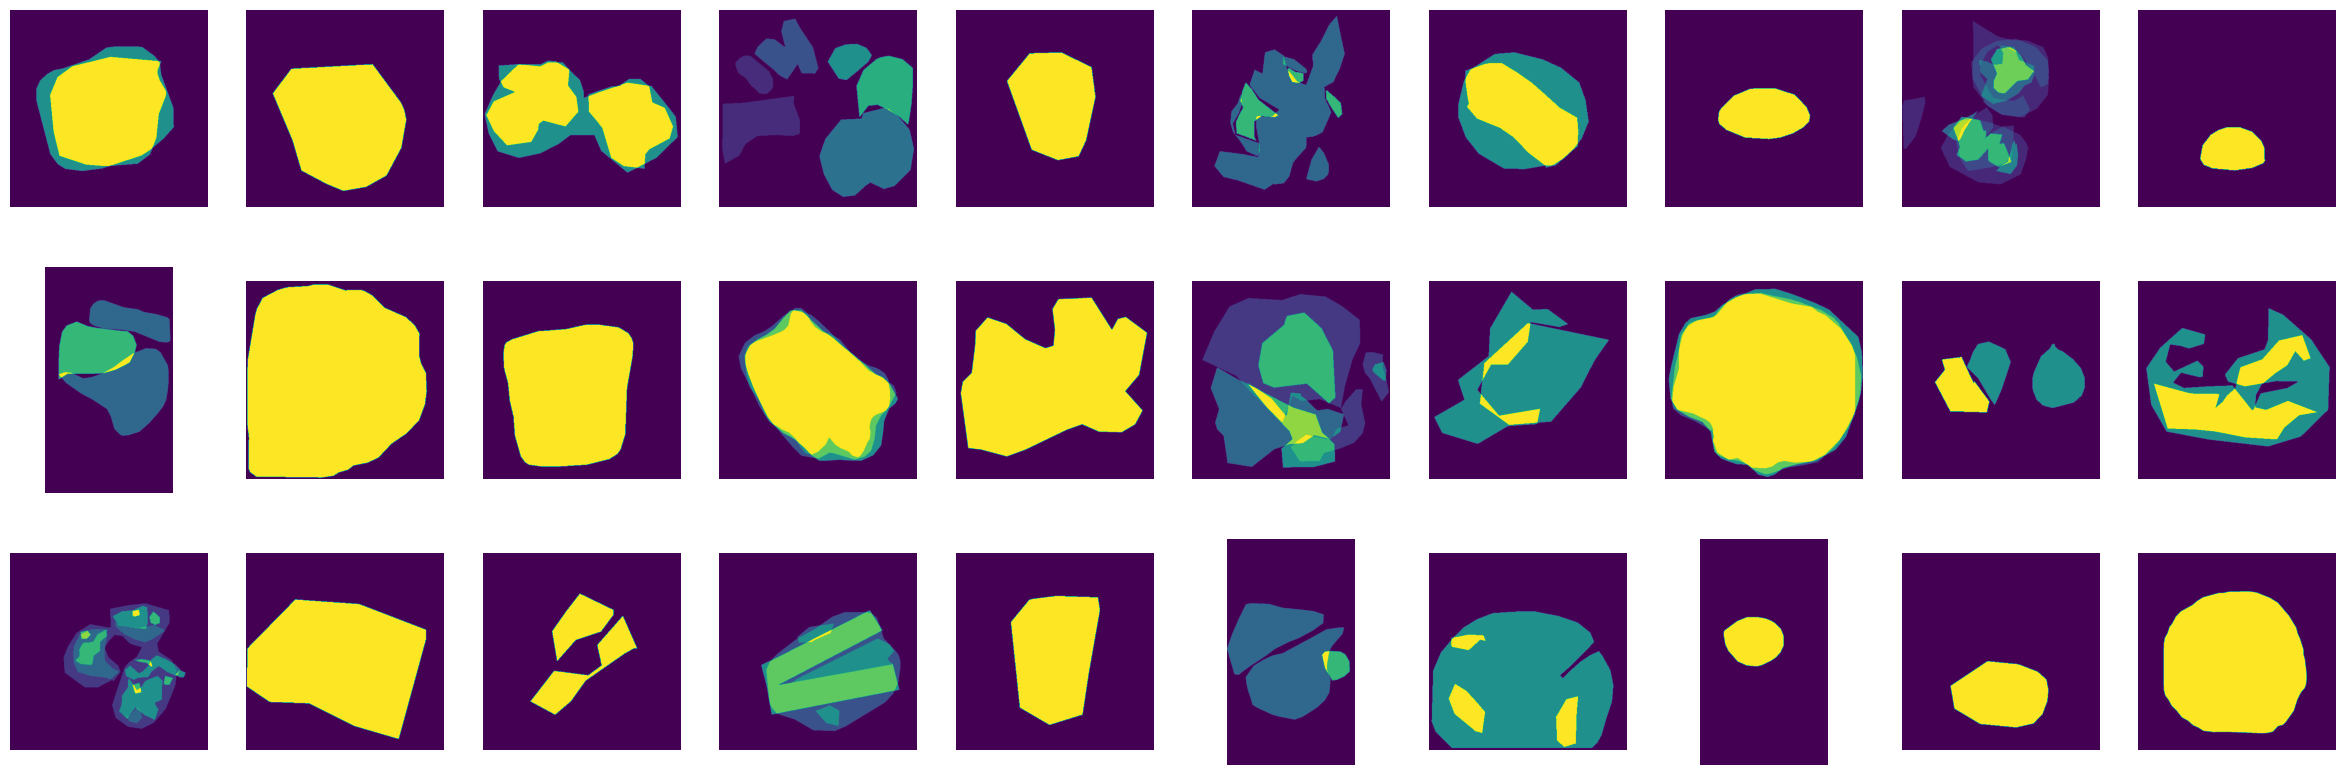

In [20]:
fig = plt.figure(figsize=(30, 10))

for i in range(0, 30):
    ann_ids = train_coco.getAnnIds(imgIds=train_annotations['images'][i]['id'])
    anns = train_coco.loadAnns(ann_ids)
    
    fig.add_subplot(3, 10, i+1)

    mask = train_coco.annToMask(anns[0])
    for j in range(len(anns)):
        mask += train_coco.annToMask(anns[j]) * j

    plt.imshow(mask)

    plt.axis(False)

# Preparing the data

In [21]:
# Function for creating masks
# maskpath - folder to put masks
# coco_anns - COCO annotations helper
def create_masks(maskpath, coco_anns):
    mask_path = maskpath
    if os.path.exists(mask_path):
        print('Path exists')
    else:
        os.mkdir(mask_path)

        img_info = coco_anns.loadImgs(coco_anns.getImgIds())

        for i in tqdm(range(len(img_info))):
            ann_ids = coco_anns.getAnnIds(imgIds=img_info[i]['id'])
            anns = coco_anns.loadAnns(ann_ids)
            
            mask = coco_anns.annToMask(anns[0])
            
            for j in range(len(anns)):
                mask += coco_anns.annToMask(anns[j]) * j
            
            cv2.imwrite(mask_path+f'{img_info[i]["file_name"]}', mask)

In [22]:
create_masks(train_mask_path, train_coco)
create_masks(val_mask_path, validation_coco)

100%|██████████| 946/946 [00:05<00:00, 157.93it/s]


In [23]:
# Define a regular function for get_y
def get_y_func(x):
    return train_mask_path + f'{x.stem}.jpg'

In [24]:
foodcoco = DataBlock(blocks=(ImageBlock, MaskBlock()),
    get_items=get_image_files,
    get_y=get_y_func,
    item_tfms=[Resize((256), method='squish')],
    n_inp=1)

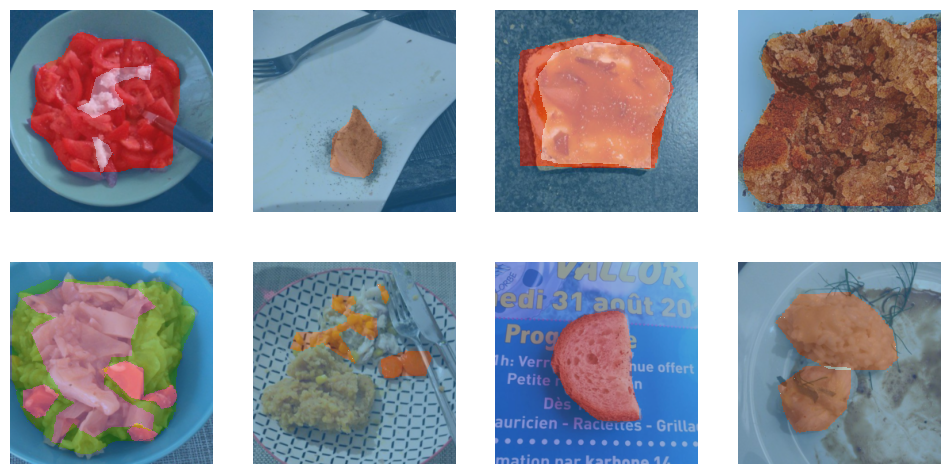

In [25]:
dls = foodcoco.dataloaders(train_img_path[:-1], bs=8)
dls.show_batch()

# Training and fine tuning the model

In [26]:
learn = unet_learner(dls, resnet18, n_out=323)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [27]:
#learn.fine_tune(1) # Large dataset, only doing 1 epoch to save time

# Evaluting the model

In [28]:
# Saving the model
#learn.save('model_1')
#learn.export('model_1_ex.pkl')

In [29]:
# Reloading the trained model
learn.load('/kaggle/input/dat255-food-recognition-from-images-model/model_1') # Path to pretrained model without file extension

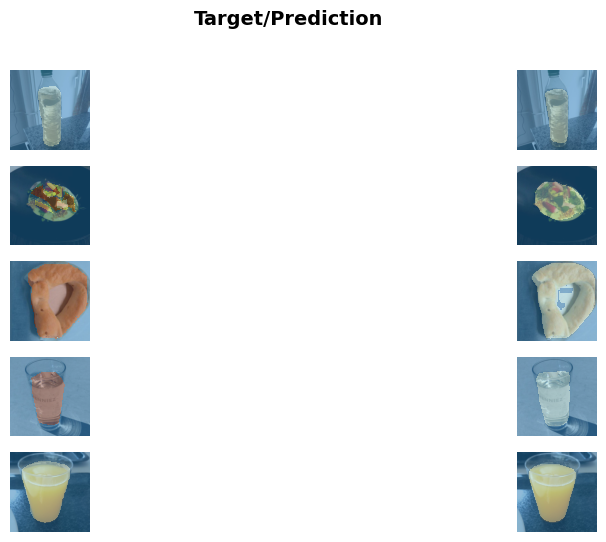

In [30]:
learn.show_results(max_n=5, figsize=(12,6))

In [81]:
# Running out of memory, when predicting on the entire test set

# Predicting on the test data
test_files = get_image_files(test_img_path)
test_dl = learn.dls.test_dl(test_files[:5]) # Limiting to 5 files
preds = learn.get_preds(dl=test_dl)

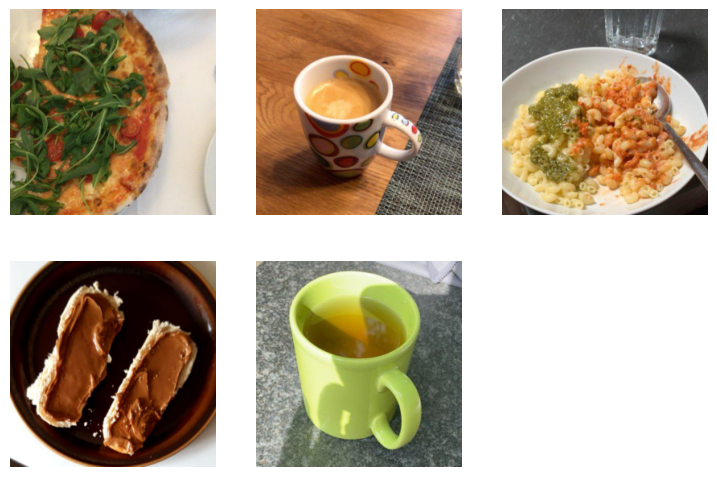

In [82]:
test_dl.show_batch()

(-0.5, 255.5, 255.5, -0.5)

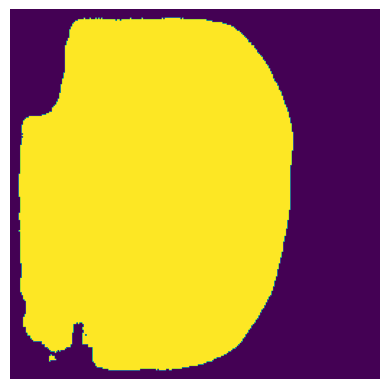

In [83]:
pred_1 = preds[0][0] # Change last index to view masks to corresponding image
pred_arx = pred_1.argmax(dim=0)
plt.imshow(pred_arx)
plt.axis(False)